<a href="https://colab.research.google.com/github/Lococo231/MO_Tasks/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
!pip install pandas seaborn scikit-learn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [69]:
import pandas as pd
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [70]:
df = pd.read_csv('/content/dataset.csv')

In [71]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [72]:
# преобразовать категориальные признаки в category
# df['column'] = df.column.astye('category')
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Нет')
cols = ['Gender', 'Occupation','BMI Category', 'Sleep Disorder']

# Преобразуем каждый столбец в category
for c in cols:
    df[c] = df[c].astype('category')

In [73]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

Y = df['Quality of Sleep']
X = df.drop('Quality of Sleep', axis=1)

X.head(n=3)
Y.head(n=3)

,Quality of Sleep
0,6
1,6
2,6


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

In [74]:
df = df.drop('Blood Pressure', axis=1)

print("КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ")
for col in ['Gender', 'Occupation', 'BMI Category']:
    print(f"\n{col}:")
    print(pd.crosstab(df[col], df['Sleep Disorder'], normalize='index').round(3))

numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'Person ID']

print("\n\nЧИСЛОВЫЕ ПРИЗНАКИ")
for col in numeric_cols:
    print(f"\n{col}:")
    print(df.groupby('Sleep Disorder')[col].agg(['mean', 'std', 'median']).round(3))

    df_corr = df.copy()
    df_corr['Sleep Disorder'] = df_corr['Sleep Disorder'].map({'Insomnia': 0, 'Sleep Apnea': 1})
    print(f"Корреляция: {df_corr[[col, 'Sleep Disorder']].corr().iloc[0, 1]:.4f}")

print(df['Sleep Disorder'].value_counts())

КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ

Gender:
Sleep Disorder  Insomnia  Sleep Apnea    Нет
Gender                                      
Female             0.195        0.362  0.443
Male               0.217        0.058  0.725

Occupation:
Sleep Disorder        Insomnia  Sleep Apnea    Нет
Occupation                                        
Accountant               0.189        0.000  0.811
Doctor                   0.042        0.056  0.901
Engineer                 0.079        0.016  0.905
Lawyer                   0.043        0.064  0.894
Manager                  0.000        0.000  1.000
Nurse                    0.041        0.836  0.123
Sales Representative     0.000        1.000  0.000
Salesperson              0.906        0.031  0.062
Scientist                0.000        0.500  0.500
Software Engineer        0.250        0.000  0.750
Teacher                  0.675        0.100  0.225

BMI Category:
Sleep Disorder  Insomnia  Sleep Apnea    Нет
BMI Category                                
Normal

/tmp/ipython-input-1653111959.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Sleep Disorder')[col].agg(['mean', 'std', 'median']).round(3))
/tmp/ipython-input-1653111959.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Sleep Disorder')[col].agg(['mean', 'std', 'median']).round(3))
/tmp/ipython-input-1653111959.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.grou

In [75]:
categorical_features = ['Gender', 'Occupation', 'Blood Pressure']
numeric_features = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps', 'Heart Rate', 'Quality of Sleep']

best_features = categorical_features + numeric_features


## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

In [99]:
df = pd.read_csv('dataset.csv')

print("Уникальные значения в Sleep Disorder:")
print(df['Sleep Disorder'].value_counts(dropna=False))

print("\nВсе значения:")
print(df['Sleep Disorder'].unique())

Уникальные значения в Sleep Disorder:
Sleep Disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

Все значения:
[nan 'Sleep Apnea' 'Insomnia']


In [109]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

df = pd.read_csv('dataset.csv')

df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No')

categorical_features = ['Gender', 'Occupation','Sleep Disorder']
numeric_features = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps', 'Heart Rate', 'Quality of Sleep']

scaler = StandardScaler()
df_numeric = pd.DataFrame(scaler.fit_transform(df[numeric_features]), columns=numeric_features)

ohe = OneHotEncoder(sparse_output=False, drop=None)
df_cat = pd.DataFrame(ohe.fit_transform(df[categorical_features]), columns=ohe.get_feature_names_out(categorical_features))

df = pd.concat([df_numeric, df_cat], axis=1)

print(df.columns.tolist())
print(df.head())



['Age', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps', 'Heart Rate', 'Quality of Sleep', 'Gender_Female', 'Gender_Male', 'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher', 'Sleep Disorder_Insomnia', 'Sleep Disorder_No', 'Sleep Disorder_Sleep Apnea']
        Age  Sleep Duration  Physical Activity Level  Daily Steps  Heart Rate  \
0 -1.753096       -1.298887                -0.825418    -1.619584    1.654719   
1 -1.637643       -1.173036                 0.039844     1.970077    1.170474   
2 -1.637643       -1.173036                 0.039844     1.970077    1.170474   
3 -1.637643       -1.550588                -1.402260    -2.362273    3.591698   
4 -1.637643       -1.550588                -1.402260    -2.362273    3.591698   

   Quality of Sleep  Gender_Fe

MAE: 0.3116
MSE: 0.2254
RMSE: 0.4748
R²: 0.6517

Колонки в X (без Sleep Disorder):
['Age', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps', 'Heart Rate', 'Quality of Sleep', 'Gender_Female', 'Gender_Male', 'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher']


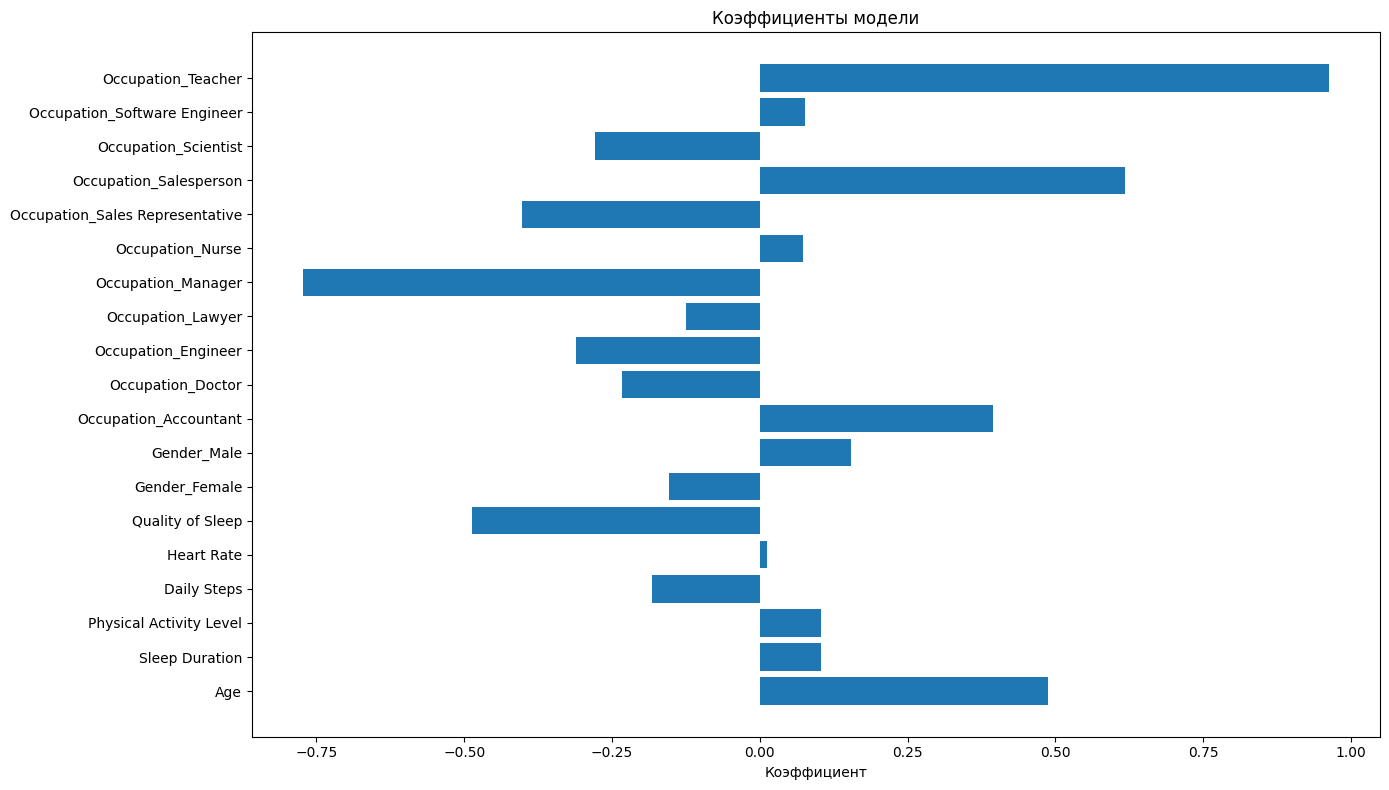

In [116]:
# 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sleep_disorder_cols = [col for col in df.columns if 'Sleep Disorder' in col]
X = df.drop(columns=sleep_disorder_cols)

####
y = df[sleep_disorder_cols].idxmax(axis=1).map({
    'Sleep Disorder_Insomnia': 2,
    'Sleep Disorder_No': 0,
    'Sleep Disorder_Sleep Apnea': 1
})
####

model1 = LinearRegression()
model1.fit(X, y)
y_pred = model1.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.4f}\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nR²: {r2:.4f}")

print("\nКолонки в X (без Sleep Disorder):")
print(X.columns.tolist())

plt.figure(figsize=(14, 8))
plt.barh(X.columns, model1.coef_)
plt.xlabel('Коэффициент')
plt.title('Коэффициенты модели')
plt.tight_layout()
plt.show()

In [79]:
df


,Age,Sleep Duration,Physical Activity Level,Daily Steps,Heart Rate,Quality of Sleep,Gender_Male,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Sleep Disorder_Not Present,Sleep Disorder_Sleep Apnea
0,-1.753096,-1.298887,-0.825418,-1.619584,1.654719,-1.098280,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.637643,-1.173036,0.039844,1.970077,1.170474,-1.098280,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.637643,-1.173036,0.039844,1.970077,1.170474,-1.098280,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.637643,-1.550588,-1.402260,-2.362273,3.591698,-2.771424,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.637643,-1.550588,-1.402260,-2.362273,3.591698,-2.771424,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.941401,1.218127,0.760896,0.113356,-0.524383,1.411435,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370,1.941401,1.092276,0.760896,0.113356,-0.524383,1.411435,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
371,1.941401,1.218127,0.760896,0.113356,-0.524383,1.411435,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
372,1.941401,1.218127,0.760896,0.113356,-0.524383,1.411435,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


ОБУЧАЮЩАЯ ВЫБОРКА
MAE: 0.2987
MSE: 0.2262
RMSE: 0.4756
R²: 0.6491

ТЕСТОВАЯ ВЫБОРКА
MAE: 0.3028
MSE: 0.2365
RMSE: 0.4863
R²: 0.6401

Колонки в X:
['Age', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps', 'Heart Rate', 'Quality of Sleep', 'Gender_Female', 'Gender_Male', 'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher']


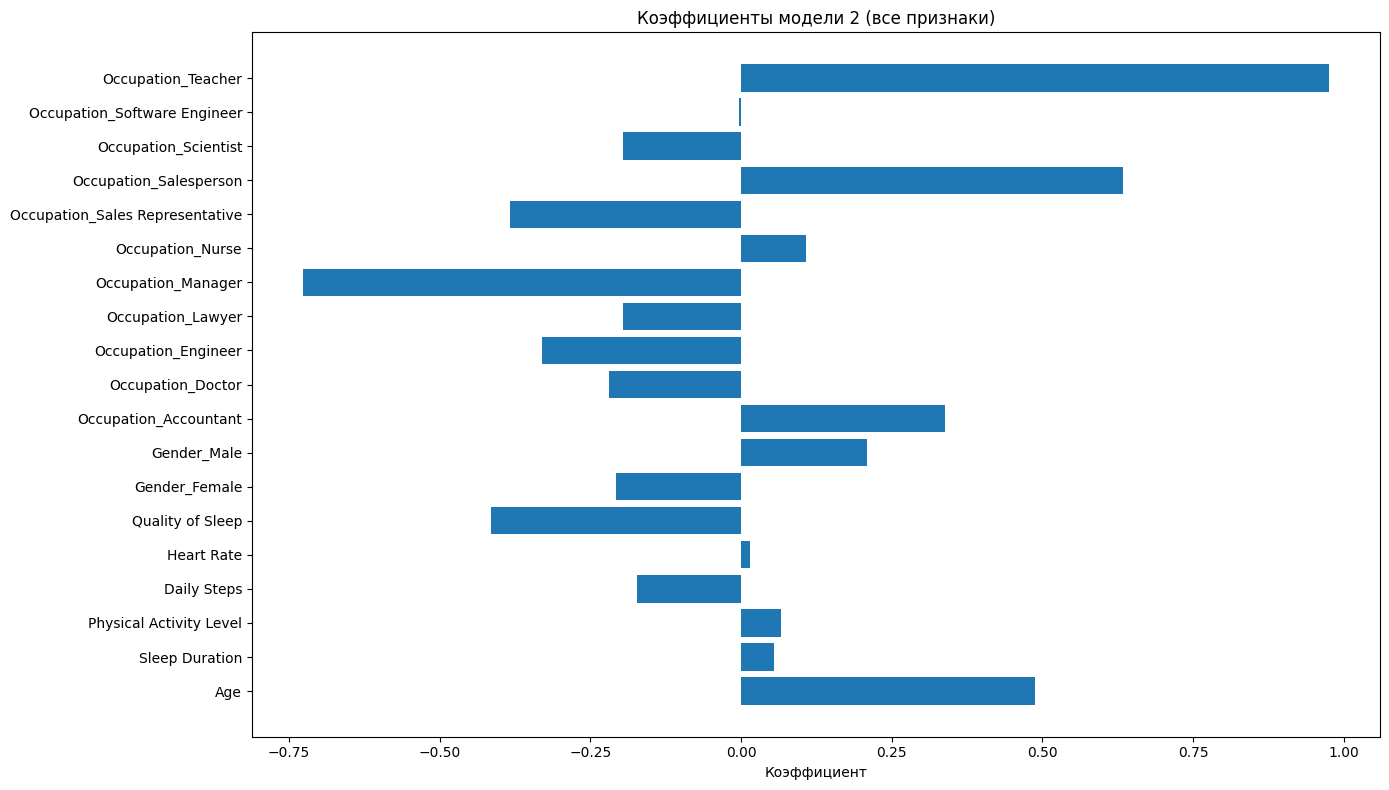

In [117]:

#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

print("ОБУЧАЮЩАЯ ВЫБОРКА")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"R²: {r2_score(y_train, y_train_pred):.4f}")

print("\nТЕСТОВАЯ ВЫБОРКА")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"R²: {r2_score(y_test, y_test_pred):.4f}")

print("\nКолонки в X:")
print(X.columns.tolist())

plt.figure(figsize=(14, 8))
plt.barh(X.columns, model2.coef_)
plt.xlabel('Коэффициент')
plt.title('Коэффициенты модели 2 (все признаки)')
plt.tight_layout()
plt.show()

# высокий R² = модель работает надёжно.

In [120]:
X

,Age,Sleep Duration,Physical Activity Level,Daily Steps,Heart Rate,Quality of Sleep,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,-1.753096,-1.298887,-0.825418,-1.619584,1.654719,-1.098280,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.637643,-1.173036,0.039844,1.970077,1.170474,-1.098280,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.637643,-1.173036,0.039844,1.970077,1.170474,-1.098280,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.637643,-1.550588,-1.402260,-2.362273,3.591698,-2.771424,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.637643,-1.550588,-1.402260,-2.362273,3.591698,-2.771424,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.941401,1.218127,0.760896,0.113356,-0.524383,1.411435,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
370,1.941401,1.092276,0.760896,0.113356,-0.524383,1.411435,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
371,1.941401,1.218127,0.760896,0.113356,-0.524383,1.411435,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
372,1.941401,1.218127,0.760896,0.113356,-0.524383,1.411435,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


MAE: 0.3376
MSE: 0.2417
RMSE: 0.4916
R²: 0.6267


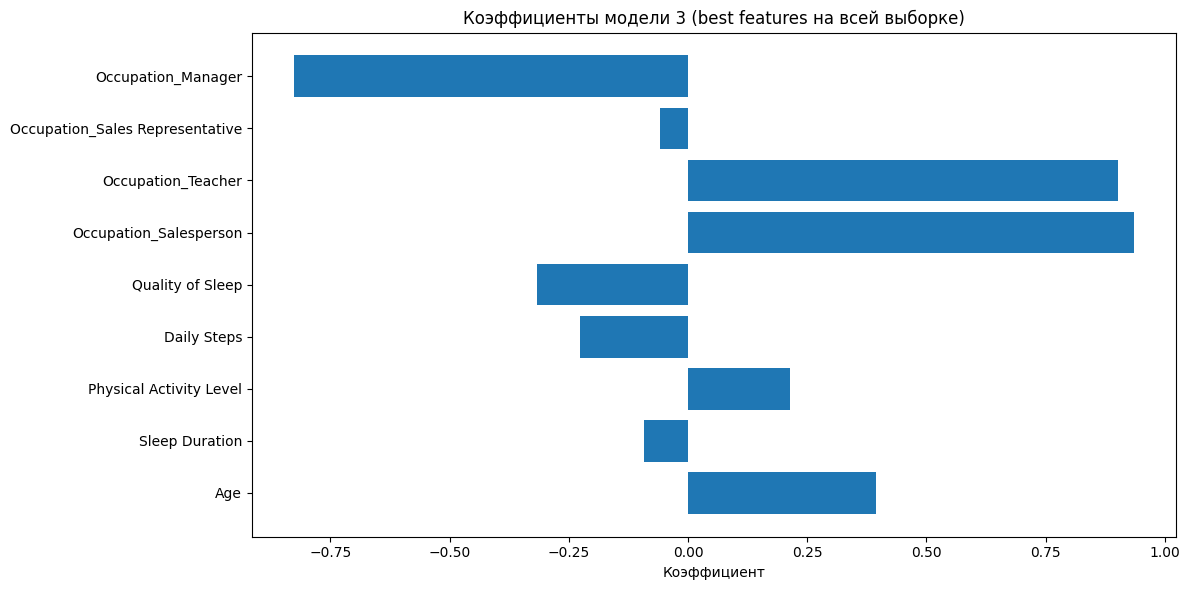

In [124]:
#3

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_features = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps', 'Quality of Sleep', 'Occupation_Salesperson','Occupation_Teacher', 'Occupation_Sales Representative','Occupation_Manager' ]
X_best = X[best_features]

model3 = LinearRegression()
model3.fit(X_best, y)
y_pred = model3.predict(X_best)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.barh(best_features, model3.coef_)
plt.xlabel('Коэффициент')
plt.title('Коэффициенты модели 3 (best features на всей выборке)')
plt.tight_layout()
plt.show()

# надо R² близко к модели 2

ОБУЧАЮЩАЯ ВЫБОРКА
MAE: 0.3338
MSE: 0.2411
RMSE: 0.4910
R²: 0.6261

ТЕСТОВАЯ ВЫБОРКА
MAE: 0.3309
MSE: 0.2494
RMSE: 0.4994
R²: 0.6204


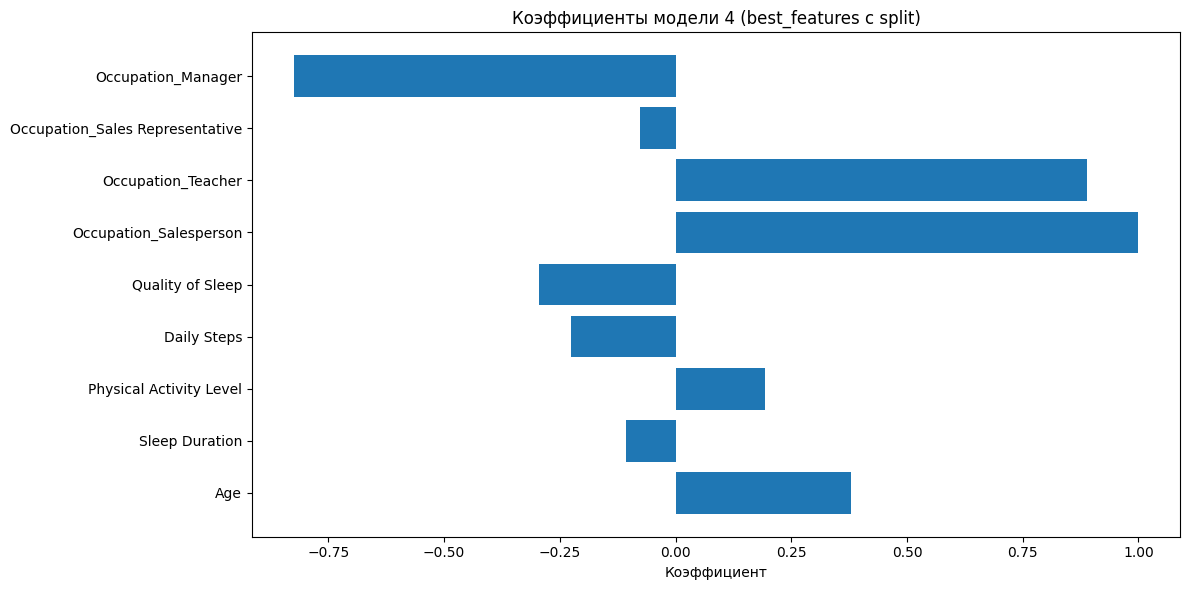

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_features = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps', 'Quality of Sleep', 'Occupation_Salesperson','Occupation_Teacher', 'Occupation_Sales Representative','Occupation_Manager']
X_best = X[best_features]

X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)

model4 = LinearRegression()
model4.fit(X_train, y_train)

y_train_pred = model4.predict(X_train)
y_test_pred = model4.predict(X_test)

print("ОБУЧАЮЩАЯ ВЫБОРКА")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"R²: {r2_score(y_train, y_train_pred):.4f}")

print("\nТЕСТОВАЯ ВЫБОРКА")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"R²: {r2_score(y_test, y_test_pred):.4f}")

plt.figure(figsize=(12, 6))
plt.barh(best_features, model4.coef_)
plt.xlabel('Коэффициент')
plt.title('Коэффициенты модели 4 (best_features с split)')
plt.tight_layout()
plt.show()

#ОБУЧАЮЩАЯ ВЫБОРКА — качество на знакомых данных (обычно выше)
#ТЕСТОВАЯ ВЫБОРКА — качество на новых данных (реальное качество модели)
#Если разница большая → переучивание (overfitting)
#КОЭФФИЦИЕНТЫ — какие признаки (профессия, возраст, сон) влияют на расстройства
#Что ищем: R² на тесте близко к обучению = модель обобщается хорошо

## Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [82]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["YOU_VARIABLE_NAME"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

KeyError: "None of [Index(['YOU_VARIABLE_NAME'], dtype='object')] are in the [columns]"

In [ ]:
X_encoded = ...

In [ ]:
X = X.drop('YOU_VARIABLE_NAME', axis=1) if 'type' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'type_white' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

### Преобразование числовых

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # попробовать избавиться от категориальных. То ест не засовывать такие признаки в стандартизацию


### Модель

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# model.fit(X, y) - обучение
# model.predict(X) - предсказание y
# model.coef_ - коэфициенты фич (каждый коэф относится по индексу к своей фиче)

# для того, чтобы не запутаться используйте следующий нейминг
model1 = LinearRegression() # модель задачи 1
model2 = LinearRegression() # модель задачи 2
... # и так далее

### Разделение на обучающую, тестовую

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест